In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

In [5]:
stations = Stations()
stations = stations.nearby(4.660687, -74.090700)
station = stations.fetch(1)

print(station)

                    name country region    wmo  icao  latitude  longitude  \
id                                                                          
80222  Bogota / Eldorado      CO    CAM  80222  SKBO    4.7167     -74.15   

       elevation        timezone hourly_start hourly_end daily_start  \
id                                                                     
80222     2547.0  America/Bogota   1941-03-01 2024-04-26  1941-03-02   

       daily_end monthly_start monthly_end     distance  
id                                                       
80222 2024-12-30    1941-01-01  2022-01-01  9054.333014  


In [2]:
# Import Meteostat library and dependencies
from datetime import datetime
from meteostat import Hourly

# Set time period
start = datetime(2023, 1, 1)
end = datetime(2023, 12, 31, 23, 59)

# Get hourly data
data = Hourly('80222', start, end)
data = data.fetch()

data = data['temp']
temps = data.values

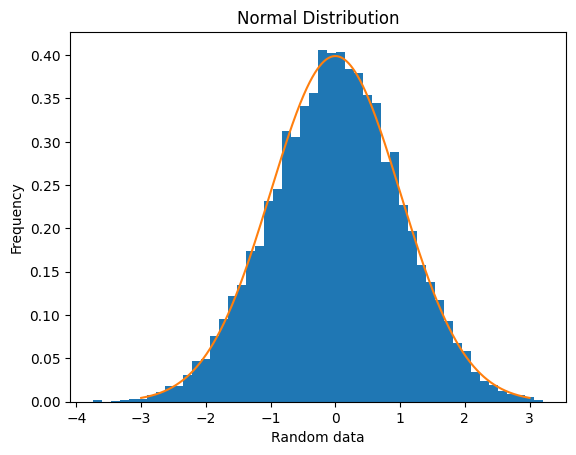

In [23]:
import matplotlib.pyplot as plt
import numpy as np

mean = 0
std = 1

# Generate random data
random_data = np.random.normal(0, 1, 10000)

plt.hist(random_data, bins=50, density=True)
plt.xlabel('Random data')
plt.ylabel('Frequency')
plt.title('Normal Distribution')

# Generate x values for the normal distribution
x = np.linspace(mean - 3*std, mean + 3*std, 10000)

# Calculate y values for the normal distribution
y = (1/(std * np.sqrt(2*np.pi))) * np.exp(-0.5*((x-mean)/std)**2)

# Plot the normal distribution
plt.plot(x, y)
plt.show()


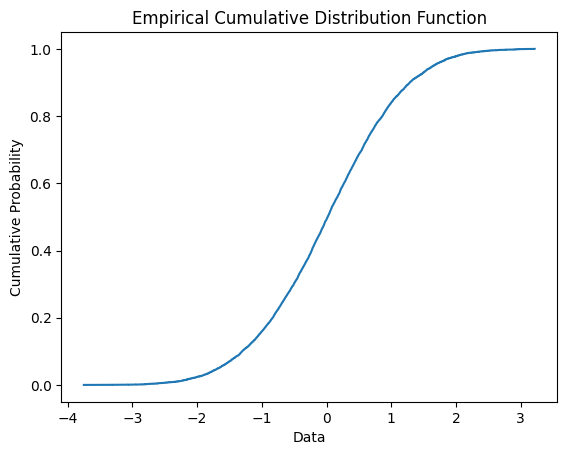

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Sort the data in ascending order
sorted_data = np.sort(random_data)

# Calculate the cumulative probabilities
cumulative_prob = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Plot the ECDF
plt.step(sorted_data, cumulative_prob, where='post')
plt.xlabel('Data')
plt.ylabel('Cumulative Probability')
plt.title('Empirical Cumulative Distribution Function')
plt.show()


In [35]:
from scipy.stats import pearsonr
import numpy as np
from scipy.stats import t

# Calculate the Pearson correlation coefficient
def pearson_correlation(x, y):
    n = len(x)
    sum_x = sum(x)
    sum_y = sum(y)
    sum_xy = sum([xi * yi for xi, yi in zip(x, y)])
    sum_x_squared = sum([xi ** 2 for xi in x])
    sum_y_squared = sum([yi ** 2 for yi in y])

    numerator = n * sum_xy - sum_x * sum_y
    denominator = ((n * sum_x_squared - sum_x ** 2) * (n * sum_y_squared - sum_y ** 2)) ** 0.5

    correlation = numerator / denominator
    return correlation

# Calculate the p-value
def p_value(correlation, n):
    t_value = correlation * ((n - 2) / (1 - correlation ** 2)) ** 0.5
    p = 2 * (1 - t.cdf(abs(t_value), n - 2))
    return p

# Calculate the correlation and p-value
correlation = pearson_correlation(sorted_data, sorted(y))
p_value = p_value(correlation, len(sorted_data))

print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)


Pearson correlation coefficient: 0.9351871268456143
p-value: 0.0
